### Prediction using Decision tree classifier

###    V.Abhinaya

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ds=pd.read_csv('task3_iris.csv')
ds

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
ds.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
ds.drop(['Id'],axis=1,inplace=True)
ds

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
ds.isnull().any()

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [6]:
ds.iloc[:,-1].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
lb=LabelEncoder()
ds.iloc[:,-1]=lb.fit_transform(ds.iloc[:,-1])
ds

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [9]:
import seaborn as sns

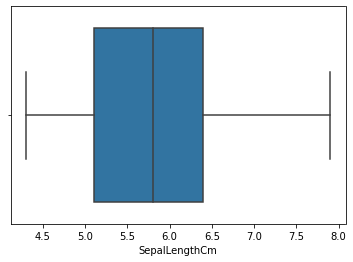

In [10]:
sns.boxplot(ds['SepalLengthCm'])

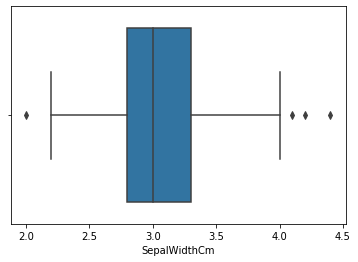

In [11]:
sns.boxplot(x=ds['SepalWidthCm'])

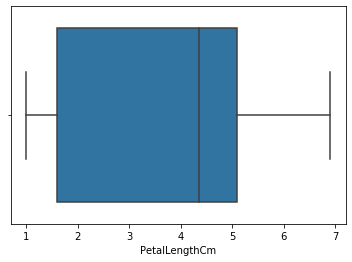

In [12]:
sns.boxplot(x=ds['PetalLengthCm'])

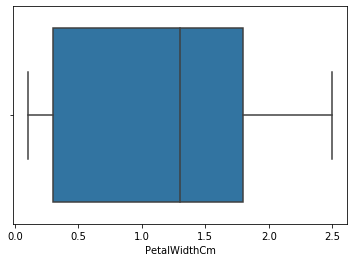

In [13]:
sns.boxplot(x=ds['PetalWidthCm'])

In [14]:
q1=ds.quantile(0.25)
q3=ds.quantile(0.75)
iqr=q3-q1
iqr

SepalLengthCm    1.3
SepalWidthCm     0.5
PetalLengthCm    3.5
PetalWidthCm     1.5
Species          2.0
dtype: float64

In [15]:
ds=ds[~((ds<(q1-1.5*iqr))|(ds>(q3+1.5*iqr))).any(axis=1)]
ds

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [16]:
from scipy import stats
z=np.abs(stats.zscore(ds))
z

array([[0.9105154 , 1.1757891 , 1.3748782 , 1.34589856, 1.25245467],
       [1.15112218, 0.09392398, 1.3748782 , 1.34589856, 1.25245467],
       [1.39172896, 0.41396125, 1.43198551, 1.34589856, 1.25245467],
       [1.51203236, 0.16001863, 1.31777088, 1.34589856, 1.25245467],
       [1.03081879, 1.42973171, 1.3748782 , 1.34589856, 1.25245467],
       [0.54960522, 2.19155956, 1.20355625, 1.08196143, 1.25245467],
       [1.51203236, 0.92184648, 1.3748782 , 1.21392999, 1.25245467],
       [1.03081879, 0.92184648, 1.31777088, 1.34589856, 1.25245467],
       [1.75263914, 0.3478666 , 1.3748782 , 1.34589856, 1.25245467],
       [1.15112218, 0.16001863, 1.31777088, 1.47786712, 1.25245467],
       [0.54960522, 1.68367433, 1.31777088, 1.34589856, 1.25245467],
       [1.27142557, 0.92184648, 1.26066356, 1.34589856, 1.25245467],
       [1.27142557, 0.09392398, 1.3748782 , 1.47786712, 1.25245467],
       [1.87294253, 0.09392398, 1.54620014, 1.47786712, 1.25245467],
       [0.06839165, 2.44550218, 1.

In [17]:
threshold=3
np.where(z>threshold)

(array([], dtype=int64), array([], dtype=int64))

In [18]:
x=ds.iloc[:,0:4].values

In [19]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [4.9, 3.1, 1.5, 0.1],
       [5. , 3.2, 1.2, 0.2],
       [5.5, 3.5, 1.3, 0.2],
       [4.9, 3

In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.9105154 ,  1.1757891 , -1.3748782 , -1.34589856],
       [-1.15112218, -0.09392398, -1.3748782 , -1.34589856],
       [-1.39172896,  0.41396125, -1.43198551, -1.34589856],
       [-1.51203236,  0.16001863, -1.31777088, -1.34589856],
       [-1.03081879,  1.42973171, -1.3748782 , -1.34589856],
       [-0.54960522,  2.19155956, -1.20355625, -1.08196143],
       [-1.51203236,  0.92184648, -1.3748782 , -1.21392999],
       [-1.03081879,  0.92184648, -1.31777088, -1.34589856],
       [-1.75263914, -0.3478666 , -1.3748782 , -1.34589856],
       [-1.15112218,  0.16001863, -1.31777088, -1.47786712],
       [-0.54960522,  1.68367433, -1.31777088, -1.34589856],
       [-1.27142557,  0.92184648, -1.26066356, -1.34589856],
       [-1.27142557, -0.09392398, -1.3748782 , -1.47786712],
       [-1.87294253, -0.09392398, -1.54620014, -1.47786712],
       [-0.06839165,  2.44550218, -1.48909283, -1.34589856],
       [-0.54960522,  2.19155956, -1.43198551, -1.08196143],
       [-0.9105154 ,  1.

In [21]:
y=ds.iloc[:,-1].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [23]:
x_train.shape

(116, 4)

In [24]:
y_train.shape

(116,)

In [25]:
x_test.shape

(30, 4)

In [26]:
y_test.shape

(30,)

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='gini',random_state=0,max_depth=5)

In [28]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [29]:
y_pred=dt.predict(x_test)
y_pred

array([0, 0, 0, 2, 2, 1, 0, 0, 2, 0, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 2, 0,
       2, 1, 2, 0, 2, 1, 1, 2])

F:\ANACONDA\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


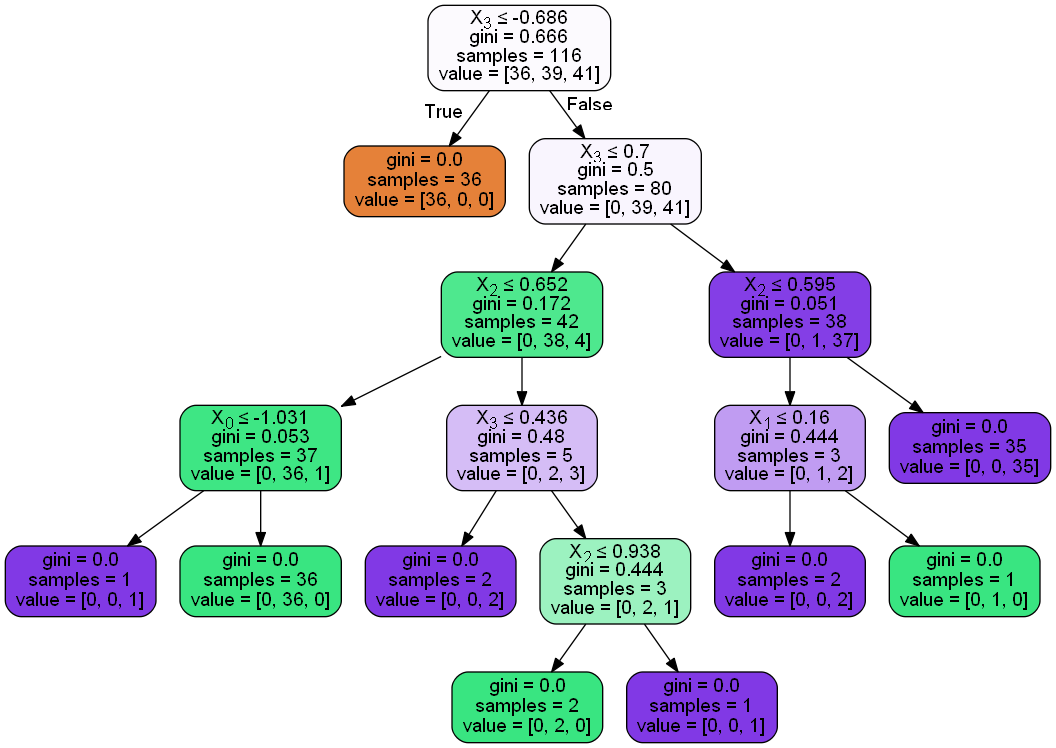

In [30]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())